# **Time series forecasting**

This class would focus on working with in-memory time series datasets


In [15]:
# ignore all the warnings, there are a lot of warnings in our code since we use a lot of default parameters
import warnings
warnings.filterwarnings("ignore")

At the end of this class, you should be able to:
> 1. Load your own time series data.
> 2. Convert your time series data to a supervised learning problem.
> 3. Describe, Visualize, and Preprocess your data.
> 4. Apply algorithms, compare them and tune their parameters accuracy.
> 5. Finalize, save and load your model.

Time series as supervised learning:

> y = f(x)

## Defining your problem:
> Whether it is a univariate or multivariate time series?
* **Univariate Time Series:** These are datasets where only a single variable is observed at each time, such as temperature each hour. The example in the previous section is a univariate time series dataset.
* **Multivariate Time Series:** These are datasets where two or more variables are observed at each time.

> Is it a classification or regression problem?

> Do you have to do a One-step or Multi-step forecast?
* **One-Step Forecast:** This is where the next time step (t+1) is predicted.
* **Multi-Step Forecast:** This is where two or more future time steps are to be predicted.

## Time series as a supervised learning problem

**A (Univariate) time series that looks like this:**

In [ ]:
Time, Data
1, 50
2, 30
3, 65
4, 41
5, 55
6, 25
7, 42
8, 67
9, 33
10, 56

**Restructured data:**

In [ ]:
x, y
?, 50
50, 30
30, 65
65, 41
41, 55
55, 25
25, 42
42, 67
67, 33
33, 56
56, ?

**A Multivariate time-series looks like this:**

In [ ]:
Time, Data1, Data2
1, 50, 3.4
2, 30, 2.6
3, 65, 4.9
4, 41, 2.3
5, 55, 1.5
6, 25, 3.3
7, 42, 3.2
8, 67, 5.7
9, 33, 4.8
10, 56, 2.9

**Restructured data:**
> 3 inputs one output

In [ ]:
X1, X2, X3, y
?, ?, 50, 3.4
50, 3.4, 30, 2.6
30, 2.6, 65, 4.9
65, 4.9, 41, 2.3
41, 2.3, 55, 1.5
55, 1.5, 25, 3.3
25, 3.3, 42, 3.2
42, 3.2, 67, 5.7
67, 5.7, 33, 4.8
33, 4.8, 56, 2.9
56, 2.9, ?, ?

**Restructured data:**
> 2 inputs 2 outputs

In [ ]:
X1, X2, y1, y2
?, ?, 50, 3.4
50, 3.4, 30, 2.6
30, 2.6, 65, 4.9
65, 4.9, 41, 2.3
41, 2.3, 55, 1.5
55, 1.5, 25, 3.3
25, 3.3, 42, 3.2
42, 3.2, 67, 5.7
67, 5.7, 33, 4.8
33, 4.8, 56, 2.9
56, 2.9, ?, ?

## Sliding window with multi-step forecasting:
Example below shows Univariate time-series:

In [ ]:
Time, Data
1, 50
2, 30
3, 65
4, 41
5, 55
6, 25
7, 42
8, 67
9, 33
10, 56

**Restructured data:**
> 1 inputs 2 outputs

In [ ]:
X1, y1, y2
?, 50, 30
50, 30, 65
30, 65, 41
65, 41, 55
41, 55, 25
55, 25, 42
25, 42, 67
42, 67, 33
67, 33, 56
33, 56, ?
56, ?, ?

## Practical ways to convert time series to supervised learning problem:

## Loading time series data

### Time series datasets
daily-minimum-temperatures-in-me.csv -- Dataset showing daily minimum temperatures in the state of Maine over a period of 10 years.

In [16]:
# Reading using csv module
import csv

with open('../input/daily-minimum-temperatures-in-me.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    
    ## to print all rows
    #for row in csvReader:
    #    print(row)
    
    # to print only first 5 rows
    for i, row in enumerate(csvReader):
        if(i < 6):
            print(row)
        else:
            break
    
    # Remember data.head() and what it does?


['Date', 'Daily minimum temperatures']
['1/1/1981', '20.7']
['1/2/1981', '17.9']
['1/3/1981', '18.8']
['1/4/1981', '14.6']
['1/5/1981', '15.8']


In [17]:
# describe the data
import pandas as pd

df1 = pd.read_csv("../input/daily-minimum-temperatures-in-me.csv")
description = df1.describe()
print(description)

       Daily minimum temperatures
count                 3650.000000
mean                    11.177753
std                      4.071837
min                      0.000000
25%                      8.300000
50%                     11.000000
75%                     14.000000
max                     26.300000


In [18]:
# reading using Pandas in dataframes
import pandas as pd

df1 = pd.read_csv("../input/daily-minimum-temperatures-in-me.csv")
print(df1.head())

       Date  Daily minimum temperatures
0  1/1/1981                        20.7
1  1/2/1981                        17.9
2  1/3/1981                        18.8
3  1/4/1981                        14.6
4  1/5/1981                        15.8


## Pandas **shift()** function

Given a DataFrame, the **shift()** function can be used to create copies of columns that are pushed forward

Rows of NaN values are added to the front or pulled back rows of NaN values added to the end.

In [19]:
from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t-1'] = df['t'].shift(1)
print(df)

   t  t-1
0  0  NaN
1  1  0.0
2  2  1.0
3  3  2.0
4  4  3.0
5  5  4.0
6  6  5.0
7  7  6.0
8  8  7.0
9  9  8.0


The forecast column can be taken as an input (X) and the second as an output value (y). That is the input value of 0 can be used to forecast the output value of 1.

In [20]:
from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t+1'] = df['t'].shift(-1)
print(df)

   t  t+1
0  0  1.0
1  1  2.0
2  2  3.0
3  3  4.0
4  4  5.0
5  5  6.0
6  6  7.0
7  7  8.0
8  8  9.0
9  9  NaN


## series_to_supervised() Function

In this section, we will define a new Python function named series_to_supervised() that takes a univariate or multivariate time series and frames it as a supervised learning dataset.

The function takes four arguments:

* data: Sequence of observations as a list or 2D NumPy array. Required.
* n_in: Number of lag observations as input (X). Values may be between [1..len(data)] Optional. Defaults to 1.
* n_out: Number of observations as output (y). Values may be between [0..len(data)-1]. Optional. Defaults to 1.
* dropnan: Boolean whether or not to drop rows with NaN values. Optional. Defaults to True.

The function returns a single value:
* return: Pandas DataFrame of series framed for supervised learning.

In [21]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        """
        Frame a time series as a supervised learning dataset.
        Arguments:
                data: Sequence of observations as a list or NumPy array.
                n_in: Number of lag observations as input (X).
                n_out: Number of observations as output (y).
                dropnan: Boolean whether or not to drop rows with NaN values.
        Returns:
                Pandas DataFrame of series framed for supervised learning.
        """
        n_vars = 1 if type(data) is list else data.shape[1]
        df = DataFrame(data)
        cols, names = list(), list()
        
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
                cols.append(df.shift(i))
                names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
                
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
                cols.append(df.shift(-i))
                if i == 0:
                        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
                else:
                        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
                        
        # put it all together
        agg = concat(cols, axis=1)
        agg.columns = names
        
        # drop rows with NaN values
        if dropnan:
                agg.dropna(inplace=True)
        return agg


values = [x for x in range(10)]
data = series_to_supervised(values)
print(data)

   var1(t-1)  var1(t)
1        0.0        1
2        1.0        2
3        2.0        3
4        3.0        4
5        4.0        5
6        5.0        6
7        6.0        7
8        7.0        8
9        8.0        9


We can see that the observations are named “var1” and that the input observation is suitably named (t-1) and the output time step is named (t).

We can also see that rows with NaN values have been automatically removed from the DataFrame.

We can repeat this example with an arbitrary number length input sequence, such as 3. This can be done by specifying the length of the input sequence as an argument; for example:

In [22]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        """
        Frame a time series as a supervised learning dataset.
        Arguments:
                data: Sequence of observations as a list or NumPy array.
                n_in: Number of lag observations as input (X).
                n_out: Number of observations as output (y).
                dropnan: Boolean whether or not to drop rows with NaN values.
        Returns:
                Pandas DataFrame of series framed for supervised learning.
        """
        n_vars = 1 if type(data) is list else data.shape[1]
        df = DataFrame(data)
        cols, names = list(), list()
        
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
                cols.append(df.shift(i))
                names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
                
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
                cols.append(df.shift(-i))
                if i == 0:
                        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
                else:
                        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
                        
        # put it all together
        agg = concat(cols, axis=1)
        agg.columns = names
        
        # drop rows with NaN values
        if dropnan:
                agg.dropna(inplace=True)
        return agg


values = [x for x in range(10)]
data = series_to_supervised(values, 3)
print(data)

   var1(t-3)  var1(t-2)  var1(t-1)  var1(t)
3        0.0        1.0        2.0        3
4        1.0        2.0        3.0        4
5        2.0        3.0        4.0        5
6        3.0        4.0        5.0        6
7        4.0        5.0        6.0        7
8        5.0        6.0        7.0        8
9        6.0        7.0        8.0        9


## Multistep Univariate Forecasting

In [23]:
data = series_to_supervised(values, 2, 2)
print(data)

   var1(t-2)  var1(t-1)  var1(t)  var1(t+1)
2        0.0        1.0        2        3.0
3        1.0        2.0        3        4.0
4        2.0        3.0        4        5.0
5        3.0        4.0        5        6.0
6        4.0        5.0        6        7.0
7        5.0        6.0        7        8.0
8        6.0        7.0        8        9.0


## Multivariate Forecasting

In [24]:
raw = DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
values = raw.values
data = series_to_supervised(values)
print(data)

   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        0.0       50.0        1       51
2        1.0       51.0        2       52
3        2.0       52.0        3       53
4        3.0       53.0        4       54
5        4.0       54.0        5       55
6        5.0       55.0        6       56
7        6.0       56.0        7       57
8        7.0       57.0        8       58
9        8.0       58.0        9       59


In [25]:
data = series_to_supervised(values, 1, 2)
print(data)

   var1(t-1)  var2(t-1)  var1(t)  var2(t)  var1(t+1)  var2(t+1)
1        0.0       50.0        1       51        2.0       52.0
2        1.0       51.0        2       52        3.0       53.0
3        2.0       52.0        3       53        4.0       54.0
4        3.0       53.0        4       54        5.0       55.0
5        4.0       54.0        5       55        6.0       56.0
6        5.0       55.0        6       56        7.0       57.0
7        6.0       56.0        7       57        8.0       58.0
8        7.0       57.0        8       58        9.0       59.0


# Real-world example:

## Normalizing and standardizing data

Normalization is the rescaling of data within a range of 0 to 1.  The mathematical formula for normalization is -  
>*** (current value - minimum value in the data) / (maximum value in the data - minimum value in the data)***

In the example below, we use **MinMaxScaler** object from scikit-learn to normalize our data:


In [26]:
# Normalize time series data
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

# load the dataset and print the first 5 rows
series = Series.from_csv("../input/daily-minimum-temperatures-in-me.csv", header=0)
print(series.head())

# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

## If we were using Standard Scaler
#scaler = StandardScaler()
#scaler = scaler.fit(values)
#print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])
    
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures, dtype: float64
Min: 0.000000, Max: 26.300000
[0.78707224]
[0.68060837]
[0.7148289]
[0.55513308]
[0.60076046]
[20.7]
[17.9]
[18.8]
[14.6]
[15.8]


Remember how we used Standard Scalar in our last class for normalizing and standardizing 

In [27]:
# Standardize time series data
from pandas import Series
from sklearn.preprocessing import StandardScaler
from math import sqrt

# load the dataset and print the first 5 rows
series = Series.from_csv('../input/daily-minimum-temperatures-in-me.csv', header=0)
print(series.head())

# prepare data for standardization
values = series.values
values = values.reshape((len(values), 1))

# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])
    
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures, dtype: float64
Mean: 11.177753, StandardDeviation: 4.071279
[2.33888328]
[1.65113873]
[1.87219948]
[0.84058266]
[1.13533032]
[20.7]
[17.9]
[18.8]
[14.6]
[15.8]


## Visualizing the data

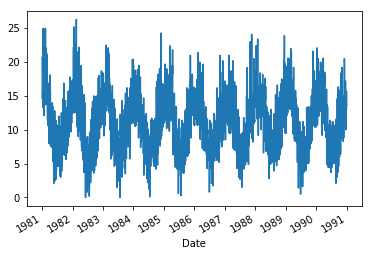

<Figure size 2160x720 with 0 Axes>

In [28]:
# Line plot
from matplotlib import pyplot
series.plot()
pyplot.figure(figsize=(30,10))
pyplot.show()

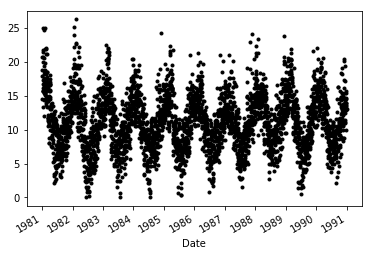

<Figure size 2160x720 with 0 Axes>

In [29]:
# Line plot with dots instead of lines
series.plot(style='k.')
pyplot.figure(figsize=(30,10))
pyplot.show()

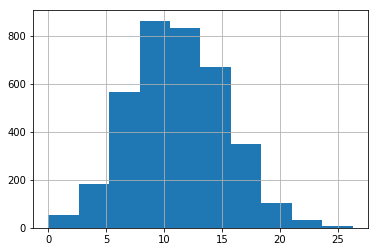

<Figure size 2160x720 with 0 Axes>

In [30]:
# Histogram
from matplotlib import pyplot
series.hist()
pyplot.figure(figsize=(30,10))
pyplot.show()

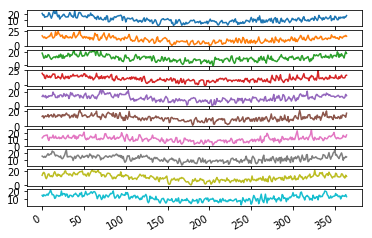

<Figure size 2160x720 with 0 Axes>

In [31]:
# a plot of this contrived DataFrame is created with each column visualized as a subplot with legends removed to cut back on the clutter
# creates 10 line plots, one for each year from 1981 to 1990 (top to bottom), where each line plot is 365 days in length.

from pandas import DataFrame
from pandas import TimeGrouper
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.figure(figsize=(30,10))
pyplot.show()

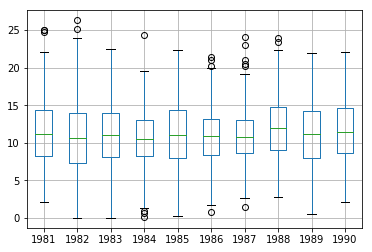

<Figure size 2160x720 with 0 Axes>

In [32]:
# Box and whiskers plot

years.boxplot()
pyplot.figure(figsize=(30,10))
pyplot.show()

### Box and whiskers plot can have the following components in order:
1. Outliers
2. Highest value in the data
3. Third Quartile
4. Second Quartile (also the median)
5. First Quartile
6. Lowest value in the data
7. Outliers

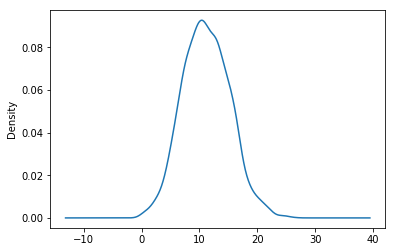

<Figure size 2160x720 with 0 Axes>

In [33]:
# Density plot
series.plot(kind='kde')
pyplot.figure(figsize=(30,10))
pyplot.show()

## Developing a baseline forecast model 

A baseline forecast model would act as a reference for all other modeling techniques for your problem. You can compare the performance of your model to this baseline model and determine the usefulness of the test algorithm for your data.

## Using Persistence Algorithm on our data:

The persistence forecast involves using the previous observation to predict the next time step.

For this reason, the approach is often called the naive forecast.

    t-1   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8
Test MSE: 6.827
Test RMSE: 2.613


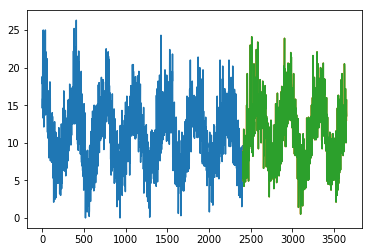

<Figure size 5760x2880 with 0 Axes>

In [36]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

series = Series.from_csv('../input/daily-minimum-temperatures-in-me.csv', header=0)

# Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
error = mean_squared_error(test_y, predictions)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % rmse)

# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.figure(figsize=(80,40))  ## changed the size of the plot
pyplot.show()

## Optimized Persistence Forecast

Why stop with using the previous observation? In this section, we will look at automating the persistence forecast and evaluate the use of any arbitrary prior time step to predict the next time step.

We will explore using each of the prior 7 entries of point observations in a persistence model. Each configuration will be evaluated using the test harness and RMSE scores collected. We will then display the scores and graph the relationship between the persisted time step and the model skill.

The complete example is listed below.

p=1 RMSE:1.850
p=2 RMSE:2.045
p=3 RMSE:1.754
p=4 RMSE:1.583
p=5 RMSE:2.134
p=6 RMSE:2.315
p=7 RMSE:2.173
p=8 RMSE:1.635
p=9 RMSE:1.806
p=10 RMSE:1.500
p=11 RMSE:1.785
p=12 RMSE:1.327
p=13 RMSE:2.224
p=14 RMSE:1.549
p=15 RMSE:1.977
p=16 RMSE:2.323
p=17 RMSE:2.428
p=18 RMSE:2.953
p=19 RMSE:3.914
p=20 RMSE:4.597
p=21 RMSE:4.421
p=22 RMSE:4.473
p=23 RMSE:4.242
p=24 RMSE:4.324


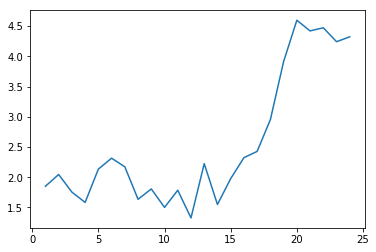

In [62]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load data
series = Series.from_csv('../input/daily-minimum-temperatures-in-me.csv', header=0)
# prepare data
X = series.values
train, test = X[0:-7], X[-7:]
persistence_values = range(1, 25)
scores = list()
for p in persistence_values:
        # walk-forward validation
        history = [x for x in train]
        predictions = list()
        for i in range(len(test)):
                # make prediction
                yhat = history[-p]
                predictions.append(yhat)
                # observation
                history.append(test[i])
        # report performance
        rmse = sqrt(mean_squared_error(test, predictions))
        scores.append(rmse)
        print('p=%d RMSE:%.3f' % (p, rmse))
# plot scores over persistence values
pyplot.plot(persistence_values, scores)
pyplot.show()

We can use the t-12 model to make a prediction and plot it against the test data.

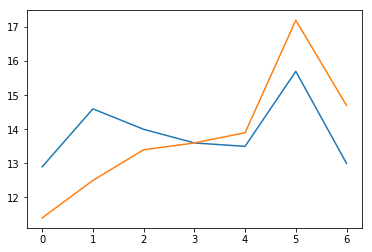

In [64]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load data
series = Series.from_csv('../input/daily-minimum-temperatures-in-me.csv', header=0)
# prepare data
X = series.values
train, test = X[0:-7], X[-7:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
        # make prediction
        yhat = history[-12]
        predictions.append(yhat)
        # observation
        history.append(test[i])
# plot predictions vs observations
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

## Developing other forecast models (example, ARIMA)

## ARIMA

A popular and widely used statistical method for time series forecasting is the ARIMA model.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.

Lag: 29
Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test MSE: 1.502
Test RMSE: 1.225


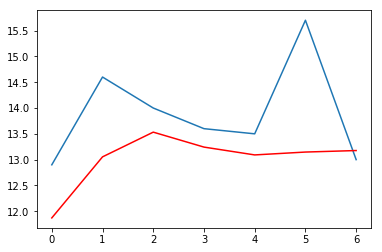

In [38]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('../input/daily-minimum-temperatures-in-me.csv', header=0)

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

## I was trying to change the training and test sizes
#train_size = int(len(X) * 0.66)
#train, test = X[1:train_size], X[train_size:]

# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
        print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % rmse)

# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Improve accuracy

## "disp"

If True, convergence information is printed. For the default l_bfgs_b solver, disp controls the frequency of the output during the iterations. 

disp < 0 means no output in this case.

By default, this parameter is set to 1, which shows output.

We are dealing with this first because it is critical in removing all of the convergence output when evaluating the ARIMA model using walk-forward validation.

Setting it to False turns off all of this noise.

Lag: 29
Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test MSE: 1.502
Test RMSE: 1.225


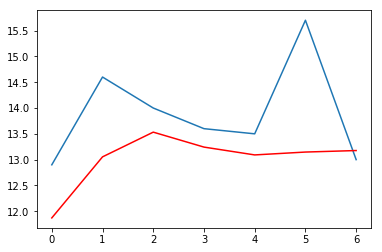

In [39]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('../input/daily-minimum-temperatures-in-me.csv', header=0)

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AR(train)
model_fit = model.fit(disp=False)
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
        print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % rmse)

# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Running the example does not change the RMSE score on this problem, with this ARIMA configuration.

## "transparams"

This parameter controls whether or not to perform a transform on AR (auto regression) parameters.  By default it is set to True.

Lag: 29
Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test MSE: 1.502
Test RMSE: 1.225


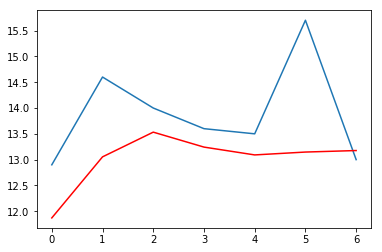

In [40]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('../input/daily-minimum-temperatures-in-me.csv', header=0)

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AR(train)
model_fit = model.fit(disp=False, transparams = False)
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
        print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % rmse)

# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Running the example does not change the RMSE score on this problem, with this ARIMA configuration.

## "trend"

The trend parameter adds an additional constant term to the model. Think of it like a bias or intercept term.

It tells us whether to include a constant or not. ‘*c*’ includes constant, ‘*nc*’ no constant.

Lag: 29
Coefficients: [ 5.92477236e-01 -8.91934435e-02  5.02777234e-02  4.19371232e-02
  4.10713100e-02  2.75597032e-02  4.61374268e-02  1.40966686e-02
  3.88655038e-02  4.94118889e-04  6.09977627e-03  1.99104653e-02
  2.82096180e-02  1.81738212e-03  2.61422214e-02  8.56672939e-03
  1.11148155e-02  3.54086281e-02 -7.94020462e-03  2.54471818e-02
  2.00485187e-02  1.33876299e-02 -1.72300288e-02 -2.64723813e-04
  1.83881179e-02  2.14853103e-02  1.17122746e-02  7.67390341e-03
  2.12701479e-03]
predicted=11.956787, expected=12.900000
predicted=13.183416, expected=14.600000
predicted=13.701036, expected=14.000000
predicted=13.435362, expected=13.600000
predicted=13.296708, expected=13.500000
predicted=13.371311, expected=15.700000
predicted=13.419414, expected=13.000000
Test MSE: 1.236
Test RMSE: 1.112


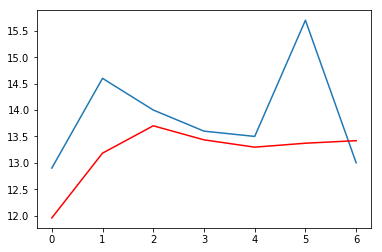

In [41]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('../input/daily-minimum-temperatures-in-me.csv', header=0)

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AR(train)
model_fit = model.fit(disp=False, trend = 'nc')
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
        print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % rmse)

# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Running the example shows a slightly better RMSE score on this problem, with this ARIMA configuration.

## "solver"

The solver parameter specifies the numerical optimization method to fit the coefficients to the data.  Used to figure out execution speeds if you have a lot of data.

The default is ‘*lbfgs*’ (limited memory Broyden-Fletcher-Goldfarb-Shanno). Other choices are ‘*bfgs*’, ‘*newton*’ (Newton-Raphson), ‘*nm*’ (Nelder-Mead), ‘*cg*’ – (conjugate gradient), ‘*ncg*’ (non-conjugate gradient), and ‘*powell*’.

Solver=lbfgs, Test RMSE: 1.434, Time=0.947439
Solver=bfgs, Test RMSE: 1.434, Time=0.820471
Solver=newton, Test RMSE: 1.434, Time=1.738489
Solver=nm, Test RMSE: 1.434, Time=1.218903
Solver=cg, Test RMSE: 1.434, Time=0.905108
Solver=ncg, Test RMSE: 1.434, Time=1.260044
Solver=powell, Test RMSE: 1.434, Time=0.846617


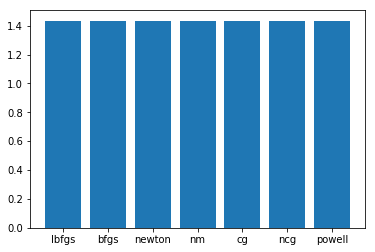

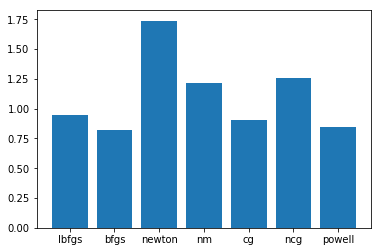

In [42]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from time import time

# load dataset
series = Series.from_csv('../input/daily-minimum-temperatures-in-me.csv', header=0)

# split into train and test sets
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# solvers
solvers = ['lbfgs', 'bfgs', 'newton', 'nm', 'cg', 'ncg', 'powell']
scores = []
times = []
for solver in solvers:
        start_time = time()
        history = [x for x in train]
        predictions = list()
        # walk-forward validation
        for t in range(len(test)):
                # fit model
                model = ARIMA(history, order=(4,1,0))
                model_fit = model.fit(disp=False, solver=solver)
                
                # one step forecast
                yhat = model_fit.forecast()[0]
                
                # store forecast and ob
                predictions.append(yhat)
                history.append(test[t])
                
        # evaluate forecasts
        rmse = sqrt(mean_squared_error(test, predictions))
        timing = time() - start_time
        scores.append(rmse)
        times.append(timing)
        print('Solver=%s, Test RMSE: %.3f, Time=%f' % (solver, rmse, timing))
        
# plot scores
ticks = [i for i in range(len(solvers))]
pyplot.bar(ticks, scores)
pyplot.xticks(ticks, solvers)
pyplot.show()

# plot times
ticks = [i for i in range(len(solvers))]
pyplot.bar(ticks, times)
pyplot.xticks(ticks, solvers)
pyplot.show()

## Finalize and save the model

Saving the model using Pickle

In [43]:
# Save Model Using Pickle
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pickle

X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit(disp=False, trend = 'nc')

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

## Load model for future use

In [61]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)